# Lab 03: Pandas
## Sam Bacon - February 15, 2021
### Practice with the Pandas library

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Getting a feel for the dataset
f500_df = pd.read_csv('fortune500.csv', sep=',')
f500_df.head(6)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5


In [ ]:
# Descriptive statistics for columns
f500_df.describe()

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


In [ ]:
# Column types
f500_df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [ ]:
# Sorting the 'bad' data
profit = f500_df['Profit (in millions)']
bad = profit.str.contains('[^0-9.-]')
profit[bad].head(5)

228    N.A.
290    N.A.
294    N.A.
296    N.A.
352    N.A.
Name: Profit (in millions), dtype: object

In [ ]:
# How many 'bad' data entries?
profit[bad].shape[0]


369

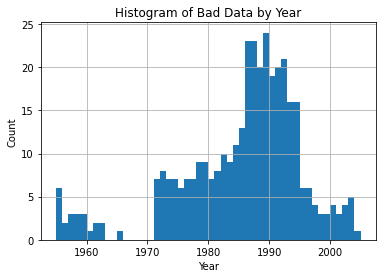

In [ ]:
# Creating 'bins' variable
min_year = bad_df['Year'].min()
max_year = bad_df['Year'].max()
bins = np.arange(min_year, max_year +1)

# Storing the 'bad' data
bad_df = f500_df[bad]


# Histogram
bad_df.hist(column=['Year'], bins = bins )

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Bad Data by Year')

plt.grid(True)
plt.show()

In [ ]:
# The not-so-bad data
clean_df = f500_df[~bad]
clean_df.head(6)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5


In [1]:
# Converting the 'Profit' data type
clean_df['Profit (in millions)'] = clean_df['Profit (in millions)'].astype(float)

NameError: ignored

In [ ]:
# Now, 'Profit' is a float
clean_df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)     float64
dtype: object

In [ ]:
# Description of the cleaned dataset
clean_df.describe()

,Year,Rank,Revenue (in millions),Profit (in millions)
count,25131.000000,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780,207.903677
std,14.764827,144.443000,11396.723687,1173.695947
min,1955.000000,1.000000,49.700000,-98696.000000
25%,1967.000000,124.000000,357.900000,8.900000
50%,1980.000000,250.000000,1017.600000,35.500000
75%,1993.000000,375.000000,3916.100000,150.500000
max,2005.000000,500.000000,288189.000000,25330.000000


In [ ]:
# How many entries?
clean_df.shape[0]

25131

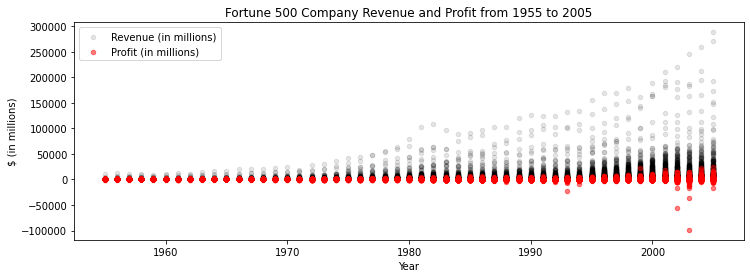

In [ ]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()

clean_df.plot(x="Year", y="Revenue (in millions)", kind="scatter", c = 'k', alpha=0.1, label='Revenue (in millions)', ax=ax)
clean_df.plot(x="Year", y="Profit (in millions)", kind="scatter", c = 'r', alpha=0.5, label='Profit (in millions)', ax=ax)

plt.ylabel('$ (in millions)')
plt.xlabel('Year')

plt.title('Fortune 500 Company Revenue and Profit from 1955 to 2005')

plt.show()

## Observation 1
As the calendar year increases, the range of company revenues has also increased. The variance between company revenues in 2005 is significantly greater than that in 1960, for example.
## Observation 2
Between 1960 and 2005, the vast majority of Fortune 500 companies reported a profit close to $0. The variance in profit has also increased over time, although this increase is much smaller than the increase in revenue variance. Only a few companies have had years with profits significantly in the negative. 